# 6.2 彩色色彩模型

Text(0.5, 1.0, 'color bars')

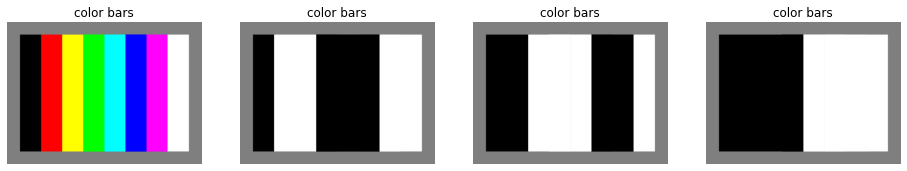

In [1]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2

# RGB 色彩模型

fig = plt.figure(figsize=(16,12))
image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/FigP0606(color_bars).tif",cv2.IMREAD_COLOR)
image_b = image[:,:,0]
image_g = image[:,:,1]
image_r = image[:,:,2]
image = np.stack([image_r,image_g,image_b],axis=2)
ax = fig.add_subplot(3,4,1)

ax.imshow(image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

image_b = image[:,:,0]
ax = fig.add_subplot(3,4,2)
ax.imshow(image_b,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

image_g = image[:,:,1]
ax = fig.add_subplot(3,4,3)
ax.imshow(image_g,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

image_r = image[:,:,2]
ax = fig.add_subplot(3,4,4)
ax.imshow(image_r,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

In [2]:
# RGB向 HSI 转换

def image_scaling(image,k):
    new_image = np.zeros((image.shape[0],image.shape[1]))
    new_image=k*(image - np.min(image))/(np.max(image) - np.min(image))
    return new_image
###
# def bgr2hsi(image):
#     # 提取RGB分量（image 图像 为BGR格式）
#     image_b = image[:,:,0]
#     image_g = image[:,:,1]
#     image_r = image[:,:,2]
#     # 对RGB 分量进行归一化
#     B = image_b/255
#     G = image_g/255
#     R = image_r/255
#     # 计算HSI分量 
#     # 获取白色和黑色区域
#     b_g_r_equal = np.bitwise_and(B == G , G == R)
#     white = np.bitwise_and(b_g_r_equal,B == np.max(B))
#     black = np.bitwise_and(b_g_r_equal,B == np.min(B))
#     white_or_black = np.bitwise_or(white,black)
#     # 白色和黑色区域赋值为0 其余按照公式计算 。添加小值为1e-8
#     theta_num = 0.5 * (R - G + R - B)
#     theta_den = np.power((R-G)*(R-G) + (R-B)*(G-B) + 1e-8,1/2)
#     theta = (180 * np.arccos(((R-G+R-B)/2) / np.power((R-G)*(R-G) + (R-B)*(G-B) + 1e-8,1/2))/np.pi)
#     theta [white_or_black] = 0
#     h = theta
#     h[B > G] = 360-theta[B > G]
#     # 对s赋值
#     temp = np.stack([R,G,B],axis=2)
#     s = 1 - 3*np.min(temp,axis=2)/(R+G+B+1e-8)
#     # i 赋值
#     i = (R+G+B)/3
#     return np.stack([h,s,i],axis=2)

In [3]:
def bgr2hsi(image):
    # 提取RGB分量（image 图像 为BGR格式）
    image_b = image[:,:,0]
    image_g = image[:,:,1]
    image_r = image[:,:,2]
    # 对RGB 分量进行归一化
    B = image_b/255
    G = image_g/255
    R = image_r/255
    # 计算HSI分量 
    # 获取白色和黑色区域
    b_g_r_equal = np.bitwise_and(B == G , G == R)
    white = np.bitwise_and(b_g_r_equal,B == np.max(B))
    black = np.bitwise_and(b_g_r_equal,B == np.min(B))
    white_or_black = np.bitwise_or(white,black)
    # 白色和黑色区域赋值为0 其余按照公式计算 。添加小值为1e-8
    theta_num = 0.5 * (R - G + R - B)
    theta_den = np.power((R-G)*(R-G) + (R-B)*(G-B),1/2)
    # 先对相等的值赋值90度
    theta = np.zeros(image.shape[:2])
    theta [theta_den == 0] =  90
    # 对白色黑色的值赋值为0度
    theta [white_or_black] = 0
    theta [theta_den != 0] = 180*np.arccos((theta_num[theta_den != 0]/theta_den[theta_den != 0])/np.max(theta_num[theta_den != 0]/theta_den[theta_den != 0]))/np.pi
    h = theta
    h[B > G] = 360-theta[B > G]
    # 对s赋值
    temp = np.stack([R,G,B],axis=2)
    s = 1 - 3*np.min(temp,axis=2)/(R+G+B+1e-8)
    # i 赋值
    i = (R+G+B)/3
    return np.stack([h,s,i],axis=2)

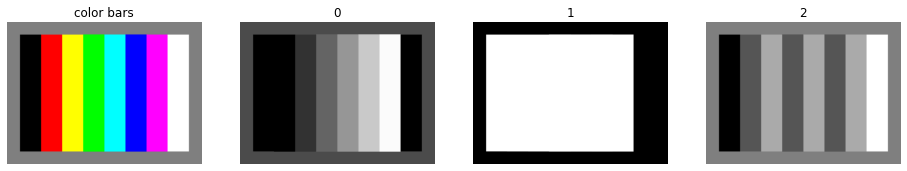

In [4]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2

fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/FigP0606(color_bars).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image_b = image[:,:,0]
image_g = image[:,:,1]
image_r = image[:,:,2]
image1 = np.stack([image_r,image_g,image_b],axis=2)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

hsi = bgr2hsi(image)

for i in range(0,3):
    temp = image_scaling(hsi[:,:,i],255)
    ax = fig.add_subplot(3,4,i+2)
    ax.imshow(temp,cmap='gray',vmin=0,vmax=255)
    ax.axis('off')
    ax.set_title(f"{i}")


In [5]:
# HSI 向 RGB 转换
def image_scaling(image,k):
    new_image = np.zeros((image.shape[0],image.shape[1]))
    new_image=k*(image - np.min(image))/np.max(image)
    return new_image
def hsi2rgb(image):
    # 提取HSI分量（image 图像 为HSI格式） 返回的是 [0,255] 范围的 RGB unit8类型图像
    image_h = image[:,:,0]   #  范围为0-360度
    image_s = image[:,:,1]
    image_i = image[:,:,2]
    # 对 SI 分量进行归一化
    H = image_h 
    S = image_s 
    I = image_i 
    # 获得三个扇区
    sector_rg = np.bitwise_and(H >= 0 ,H < 120)
    sector_gb = np.bitwise_and(H >= 120 ,H < 240)
    sector_br = np.bitwise_and(H >= 240 ,H <= 360)
    # 根据对应扇区对H的值进行处理
    H[sector_gb] = H[sector_gb] - 120
    H[sector_br] = H[sector_br] - 240
    # 将H的值转换为弧度，便于后续运算
    H = H * np.pi / 180
    # 获取各个扇区的RGB值
    image_r = np.zeros(image.shape[:2])
    image_g = np.zeros(image.shape[:2])
    image_b = np.zeros(image.shape[:2])
    # rg 扇区赋值
    image_b[sector_rg] = (I[sector_rg]*(1-S[sector_rg]))
    image_r[sector_rg] = (I[sector_rg]*(1+S[sector_rg]*np.cos(H[sector_rg])/np.cos(np.pi/3-H[sector_rg])))
    image_g[sector_rg] = (3*I[sector_rg]-(image_b[sector_rg]+image_r[sector_rg]))
    # gb 扇区赋值
    image_r[sector_gb] = (I[sector_gb]*(1-S[sector_gb]))
    image_g[sector_gb] = (I[sector_gb]*(1+S[sector_gb]*np.cos(H[sector_gb])/np.cos(np.pi/3-H[sector_gb])))
    image_b[sector_gb] = (3*I[sector_gb]-(image_r[sector_gb]+image_g[sector_gb]))
    # br 扇区赋值
    image_g[sector_br] = (I[sector_br]*(1-S[sector_br]))
    image_b[sector_br] = (I[sector_br]*(1+S[sector_br]*np.cos(H[sector_br])/np.cos(np.pi/3-H[sector_br])))
    image_r[sector_br] = (3*I[sector_br]-(image_b[sector_br]+image_g[sector_br]))
    return np.stack([image_scaling(image_r,255).astype('uint8'),image_scaling(image_g,255).astype('uint8'),image_scaling(image_b,255).astype('uint8')],axis=2) 

#  image_scaling(image_r,255).astype('uint8')
# (image_b*255).astype('uint8')

Text(0.5, 1.0, 'color bars')

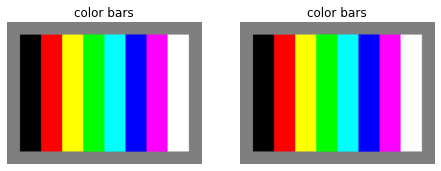

In [6]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/FigP0606(color_bars).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image_b = image[:,:,0]
image_g = image[:,:,1]
image_r = image[:,:,2]
image1 = np.stack([image_r,image_g,image_b],axis=2)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

image_hsi = bgr2hsi(image)
image_rgb = hsi2rgb(image_hsi)

ax = fig.add_subplot(3,4,2)
ax.imshow(image_rgb,vmin = 0 ,vmax= 255)
ax.axis('off')
ax.set_title(f"color bars")


# 6.3 假彩色图像处理

In [7]:
# 黑（0,0,0） 红（255,0,0） 黄（255,0,255） 绿（0,255,0） 青（255,0,255） 蓝（0,0,255） 紫（255,0,255） 白（255,255,255）

## 6.3.1 灰度分层和彩色编码

In [8]:
# image 为8位灰度图像  colorlist 为8位，依次替换灰度最大至灰度最小
def gray2color(image,colorlist=[[255,255,255],[255,0,255],[0,0,255],[255,0,255],[0,255,0],[255,0,255],[255,0,0],[0,0,0]]):
    new_image = np.zeros((image.shape[0],image.shape[1],3))
    for i in range(8):
        new_image[image < (8-i)*255//8] = colorlist[i]
    return new_image

Text(0.5, 1.0, 'rgb')

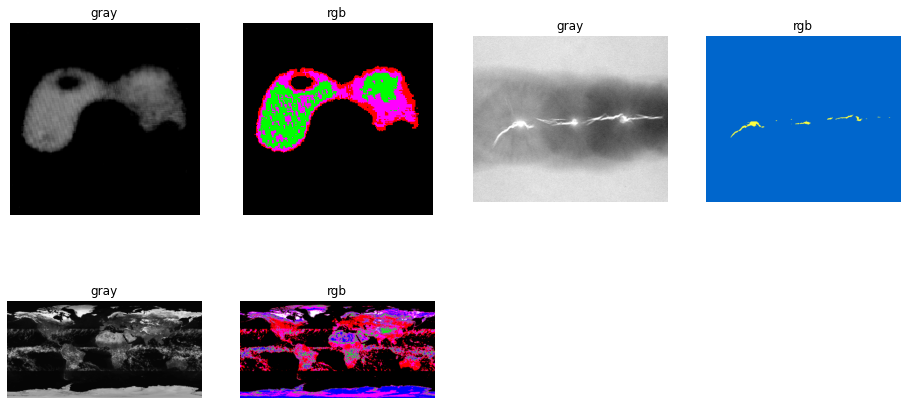

In [9]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0620(a)(picker_phantom).tif",cv2.IMREAD_GRAYSCALE)
ax = fig.add_subplot(3,4,1)
ax.imshow(image,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"gray")

new_image = gray2color(image)

ax = fig.add_subplot(3,4,2)
ax.imshow(new_image.astype('uint8'),vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"rgb")

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0621(a)(weld-original).tif",cv2.IMREAD_GRAYSCALE)
ax = fig.add_subplot(3,4,3)
ax.imshow(image,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"gray")

new_image = np.zeros((image.shape[0],image.shape[1],3))
new_image[:] = [0,102,204]
new_image[image == 255] = [255,255,63]

ax = fig.add_subplot(3,4,4)
ax.imshow(new_image.astype('uint8'),vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"rgb")

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0622(a)(tropical_rain_grayscale.tif",cv2.IMREAD_GRAYSCALE)
ax = fig.add_subplot(3,4,5)
ax.imshow(image,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"gray")

new_image = gray2color(image)

ax = fig.add_subplot(3,4,6)
ax.imshow(new_image.astype('uint8'),vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"rgb")


## 6.3.2  灰度到彩色的变换

In [10]:
# theta_r,g,b 为角度（以角度为单位） wr,wg,wb 控制频率
def gray2rgb_sin(image,theta_r,w_r,theta_g,w_g,theta_b,w_b):
    pi = np.pi
    image_r = np.abs(np.sin(w_r*image/255+theta_r*pi/180))
    image_g = np.abs(np.sin(w_g*image/255+theta_g*pi/180))
    image_b = np.abs(np.sin(w_b*image/255+theta_b*pi/180))
    image_r = image_scaling(image_r,255)
    image_g = image_scaling(image_g,255)
    image_b = image_scaling(image_b,255)
    return np.stack([image_r.astype('uint8'),image_g.astype('uint8'),image_b.astype('uint8')],axis=2)

Text(0.5, 1.0, 'rgb')

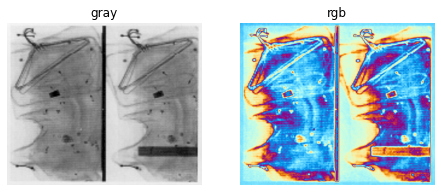

In [11]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/test.png",cv2.IMREAD_GRAYSCALE)
ax = fig.add_subplot(3,4,1)
ax.imshow(image,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"gray")


image_rgb = gray2rgb_sin(image , theta_r=0 , w_r=2.0*np.pi , theta_g=-35 , w_g = 2.0*np.pi , theta_b=-65 , w_b = 2.0*np.pi)

ax = fig.add_subplot(3,4,2)
ax.imshow(image_rgb,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"rgb")

In [12]:
# 下面是以上用到的变换函数
theta_r=0
w_r=2.5*np.pi
theta_g=-30 
w_g = 2.5*np.pi
theta_b=-60
w_b = 2.5*np.pi
x = np.arange(-0.1,1.5,0.001)
y = np.abs(np.sin(w_r*x+theta_r*pi/180))
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(3,1,1)
ax.plot(x,y)
x = np.arange(-0.1,1.5,0.001)
y = np.abs(np.sin(w_g*x+theta_g*pi/180))
ax = fig.add_subplot(3,1,2)
ax.plot(x,y)
x = np.arange(-0.1,1.5,0.001)
y = np.abs(np.sin(w_b*x+theta_b*pi/180))
ax = fig.add_subplot(3,1,3)
ax.plot(x,y)

NameError: name 'pi' is not defined

In [ ]:
# 多光谱图像的彩色编码
image_r = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0627(a)(WashingtonDC Band3-RED).TIF",cv2.IMREAD_GRAYSCALE)
image_g = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0627(b)(WashingtonDC Band2-GREEN).TIF",cv2.IMREAD_GRAYSCALE)
image_b = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0627(c)(1)(WashingtonDC Band1-BLUE).TIF",cv2.IMREAD_GRAYSCALE)
image_ir = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0627(d)(WashingtonDC Band4).TIF",cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(16,12))
i = 1
for image in [image_r , image_g , image_b , image_ir] :
    label = ['image_r' , 'image_g' , 'image_b' , 'image_ir']
    ax = fig.add_subplot(3,4,i)
    ax.imshow(image,cmap='gray',vmin=0,vmax=255)
    ax.axis('off')
    ax.set_title(f"{label[i-1]}")
    i += 1

image_irgb = np.stack([image_ir.astype('uint8'),image_g.astype('uint8'),image_b.astype('uint8')],axis=2)
ax = fig.add_subplot(3,4,5)
ax.imshow(image_irgb,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"irgb")

image_rirb = np.stack([image_r.astype('uint8'),image_ir.astype('uint8'),image_b.astype('uint8')],axis=2)
ax = fig.add_subplot(3,4,6)
ax.imshow(image_rirb,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"irgb")

# 6.5 彩色变换

## 6.5.1 公式

In [ ]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0630(01)(strawberries_fullcolor).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image_b = image[:,:,0]
image_g = image[:,:,1]
image_r = image[:,:,2]
image1 = np.stack([image_r,image_g,image_b],axis=2)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

# 在 RGB 格式下调低亮度
ax = fig.add_subplot(3,4,2)
ax.imshow((image1 * 0.7).astype('uint8'),vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

## 6.5.2 补色

In [13]:
def complementarycolor(image):
    full = np.ones(image.shape) * 255 
    new_image = full - image
    image_b = new_image[:,:,0]
    image_g = new_image[:,:,1]
    image_r = new_image[:,:,2]
    new_image = np.stack([image_r,image_g,image_b],axis=2)
    return new_image.astype('uint8')

def complementarycolor_hsi(image):
    hsi = bgr2hsi(image)
    image_h = hsi[:,:,0]
    image_s = hsi[:,:,1]
    image_i = hsi[:,:,2]
    new_image_h = np.zeros(image_h.shape)
    new_image_h  =  (image_h + 180)
    new_image_h[image_h >  180]  =  (image_h[image_h > 180] - 180)
    new_image_s = image_s
    new_image_i = 1 - image_i
    new_image_hsi = np.stack([new_image_h.astype('uint8'),new_image_s,new_image_i],axis=2)
    new_image = hsi2rgb(new_image_hsi)
    return new_image

Text(0.5, 1.0, 'color bars')

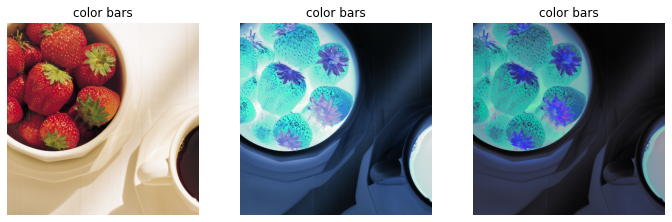

In [14]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0630(01)(strawberries_fullcolor).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image_b = image[:,:,0]
image_g = image[:,:,1]
image_r = image[:,:,2]
image1 = np.stack([image_r,image_g,image_b],axis=2)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

# 补色
new_image = complementarycolor(image)
ax = fig.add_subplot(3,4,2)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

# 此处的图像为单独输入的饱和度分量的得出来的 与文中有差异！！！
new_image = complementarycolor_hsi(image)
ax = fig.add_subplot(3,4,3)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"color bars")

## 6.5.3 彩色分层

In [15]:
# color_center 表示颜色中心， w 表示立方体的边长的一半
def ColorLayering_cube(image,color_center,w):
    # 获取一个用于表示在立方区间外的布尔矩阵
    s = np.zeros(image.shape)
    s[:] = color_center
    judge_matrix = np.abs(image - s)
    assign_matrix = np.bitwise_or((judge_matrix>w)[:,:,0],(judge_matrix>w)[:,:,1],(judge_matrix>w)[:,:,2])
    # 根据该矩阵赋值
    new_image = np.copy(image)
    new_image[assign_matrix] = [127,127,127]
    return new_image

# color_center 表示颜色中心， R 表示半径
def ColorLayering_ball(image,color_center,r):
    # 获取一个用于表示在球外的布尔矩阵
    s = np.zeros(image.shape)
    s[:] = color_center
    distance = np.sum(np.power(image-s,2),axis=2)
    assign_matrix = distance > np.power(r,2)
    # 根据该矩阵赋值
    new_image = np.copy(image)
    new_image[assign_matrix] = [127,127,127]
    return new_image

Text(0.5, 1.0, 'ball')

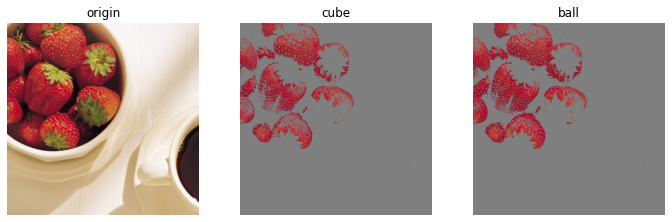

In [16]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0630(01)(strawberries_fullcolor).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image_b = image[:,:,0]
image_g = image[:,:,1]
image_r = image[:,:,2]
image1 = np.stack([image_r,image_g,image_b],axis=2)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

# 立方
new_image = ColorLayering_cube(image1,color_center = [171,41,49],w = 32)
ax = fig.add_subplot(3,4,2)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"cube")

# 球形
new_image1 = ColorLayering_ball(image1,color_center = [171,41,49],r = 44)
ax = fig.add_subplot(3,4,3)
ax.imshow(new_image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"ball")

## 6.5.4 色调和彩色校正

In [17]:
def STransform(image):
    new_image = 255/(1+np.power(0.5/(image1/255+1e-8),4.5))
    return new_image.astype('uint8')

#    可选择通道 channels = ['red','green','blue','all']
#    输入图像为RGB格式
def GammaTransform(image,gamma,channel):
    new_image = np.copy(image)
    if channel == 'red':
        new_image[:,:,0] = (255 * np.power(image[:,:,0]/255,gamma)).astype('uint8')
    elif channel == 'green':
        new_image[:,:,1] = (255 * np.power(image[:,:,1]/255,gamma)).astype('uint8')
    elif channel == 'blue':
        new_image[:,:,2] = (255 * np.power(image[:,:,2]/255,gamma)).astype('uint8')
    elif channel == 'all':
        new_image = (255 * np.power(image/255,gamma)).astype('uint8')
    return  new_image

def bgr2rgb(image):
    image_b = image[:,:,0]
    image_g = image[:,:,1]
    image_r = image[:,:,2]
    return np.stack([image_r,image_g,image_b],axis=2)

Text(0.5, 1.0, 'gamma=0.5')

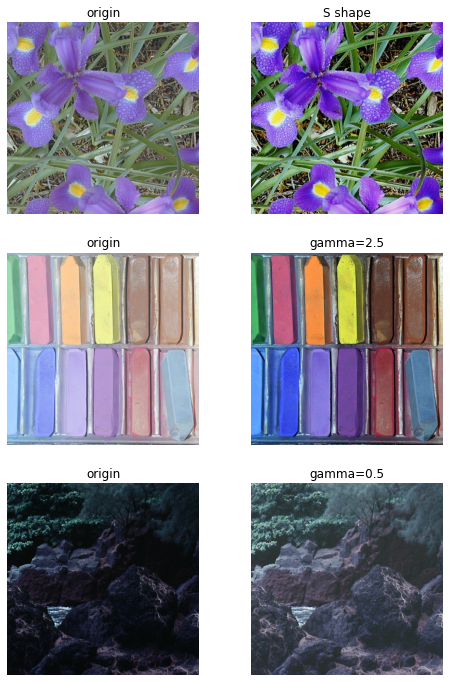

In [18]:

import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(8,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0635(top_ left_flower).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,2,1)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

new_image = STransform(image1)
ax = fig.add_subplot(3,2,2)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"S shape")

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0635(middle_row_left_chalk ).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,2,3)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

new_image = GammaTransform(image1,2.5,channel='all')
ax = fig.add_subplot(3,2,4)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"gamma=2.5")

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0635(bottom_left_stream).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,2,5)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

new_image = GammaTransform(image1,0.5,channel='all')
ax = fig.add_subplot(3,2,6)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"gamma=0.5")

Text(0.5, 1.0, 'blue gamma=0.8')

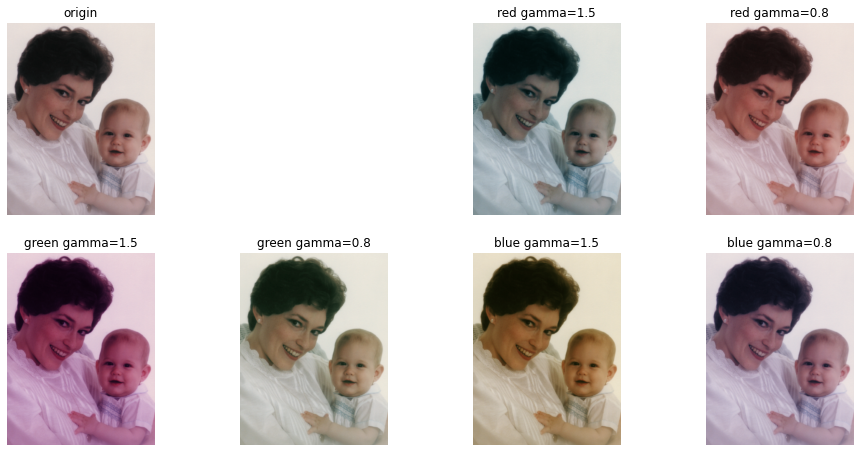

In [19]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

#  大于1 的gamma 值会增大该通道的值 反之取反 
image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0636(woman_baby_original).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

new_image = GammaTransform(image1,1.5,channel='red')
ax = fig.add_subplot(3,4,3)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"red gamma=1.5")

new_image = GammaTransform(image1,0.8,channel='red')
ax = fig.add_subplot(3,4,4)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"red gamma=0.8")

new_image = GammaTransform(image1,1.5,channel='green')
ax = fig.add_subplot(3,4,5)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"green gamma=1.5")

new_image = GammaTransform(image1,0.8,channel='green')
ax = fig.add_subplot(3,4,6)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"green gamma=0.8")

new_image = GammaTransform(image1,1.5,channel='blue')
ax = fig.add_subplot(3,4,7)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"blue gamma=1.5")

new_image = GammaTransform(image1,0.8,channel='blue')
ax = fig.add_subplot(3,4,8)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"blue gamma=0.8")

## 6.5.5 彩色直方图处理

In [20]:
def HistogramEqualization(image):
    # 统计直方图中的数据
    hist,bins = np.histogram(image.reshape(-1),bins = 256,range = (0,256))
    #构建查找表
    lut = np.zeros(256)
    hist_cum = hist.cumsum()
    lut_temp = np.ma.array(hist_cum,mask = (hist_cum == 0))
    lut_temp = 255 * (lut_temp - np.min(lut_temp))/(np.max(lut_temp)-np.min(lut_temp))
    lut = np.ma.filled(lut_temp,0).astype("uint8")
    # 根据查找表对新图像进行赋值
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(0,image.shape[0]):
        for j in range (0,image.shape[1]):
            new_image[i,j] = lut[image[i,j]]
    return new_image

Text(0.5, 1.0, 'origin')

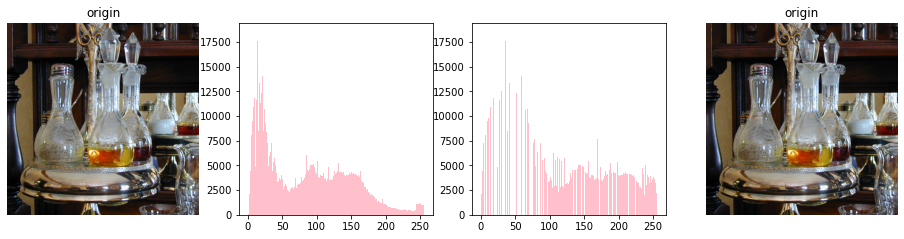

In [21]:

import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0637(a)(caster_stand_original).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

image_hsi = bgr2hsi(image)
image_i = image_hsi[:,:,2]
image_i_scale = image_scaling(image_i,255)

image_reshape = image_i_scale.reshape(-1)
ax = fig.add_subplot(3,4,2)
ax.hist(image_reshape,256,[0,256],color='PINK')

new_image_i = cv2.equalizeHist(image_i_scale.astype('uint8'))

image_reshape = new_image_i.reshape(-1)
ax = fig.add_subplot(3,4,3)
ax.hist(image_reshape,256,[0,256],color='PINK')

new_image_hsi = np.copy(image_hsi)
new_image_hsi[:,:,2] = image_i
new_image = hsi2rgb(new_image_hsi)
ax = fig.add_subplot(3,4,4) 
ax.imshow(new_image,vmin= 0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

# 6.6 彩色图像的平滑和锐化

## 6.6.1 彩色图像平滑

In [22]:
def image_duplicate_filled(kernel_size,image):
    m = kernel_size
    n = kernel_size
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    image_duplicate_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    for i in range (image.shape[0] + m - 1):
        for j in range(image.shape[1] + n - 1):
            if (i < adjust_value_n):
                if (j < adjust_value_m):
                    image_duplicate_filled[i][j] = image[0,0]
                elif (j < image.shape[1] + adjust_value_m):
                    image_duplicate_filled[i][j] = image[0,j - adjust_value_m]
                else:
                    image_duplicate_filled[i][j] = image[0,image.shape[1]-1]
            elif(i < image.shape[0] + adjust_value_n):
                if (j < adjust_value_m):
                    image_duplicate_filled[i][j] = image[i-adjust_value_n,0]
                elif (j < image.shape[1] + adjust_value_m):
                    image_duplicate_filled[i][j] = image[i-adjust_value_n,j - adjust_value_m]
                else:
                    image_duplicate_filled[i][j] = image[i-adjust_value_n,image.shape[1]-1]
            else:
                if (j < adjust_value_m):
                    image_duplicate_filled[i][j] = image[image.shape[0]-1,0]
                elif (j < image.shape[1] + adjust_value_m):
                    image_duplicate_filled[i][j] = image[image.shape[0]-1,j - adjust_value_m]
                else:
                    image_duplicate_filled[i][j] = image[image.shape[0]-1,image.shape[1]-1]
    return image_duplicate_filled

# 算术平均滤波器
def BoxFilterDulFill(m,n,image):
    kernel = np.ones((m,n))/(m*n)
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行复制填充
    image_zero_filled = image_duplicate_filled(m,image)
    # 进行卷积运算
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j] = np.sum(kernel*image_zero_filled[i:i+m,j:j+n])
    return new_image

# 输入的为RGB图像
def BoxFilter_rgb(m,n,image):
    image_r = image[:,:,0]
    image_g = image[:,:,1]
    image_b = image[:,:,2]
    new_image_r = BoxFilterDulFill(m,n,image_r)
    new_image_g = BoxFilterDulFill(m,n,image_g)
    new_image_b = BoxFilterDulFill(m,n,image_b)
    return np.stack([new_image_r.astype('uint8'),new_image_g.astype('uint8'),new_image_b.astype('uint8')],axis=2)

# 这里输入的图像为BGR模式
def BoxFilter_hsi(m,n,image):
    image_hsi = bgr2hsi(image)
    image_hsi[:,:,2] = BoxFilterDulFill(m,n,image_hsi[:,:,2])
    new_image = hsi2rgb(image_hsi)
    return new_image

Text(0.5, 1.0, 'box filter hsi')

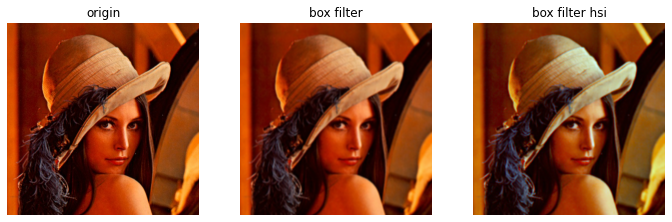

In [23]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0638(a)(lenna_RGB).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

new_image = BoxFilter_rgb(m = 5,n = 5,image = image1)
ax = fig.add_subplot(3,4,2)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"box filter")

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0638(a)(lenna_RGB).tif",cv2.IMREAD_COLOR)
new_image1 = BoxFilter_hsi(m = 5,n = 5,image = image)
ax = fig.add_subplot(3,4,3)
ax.imshow(new_image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"box filter hsi")


## 6.6.2 彩色图像锐化

In [24]:
def LaplaceFilter(kernel_type,image):
    kernel1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    kernel2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
    kernel3 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    kernel4 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    kernels = [kernel1,kernel2,kernel3,kernel4]
    kernel = kernels[kernel_type - 1]
    m = kernel.shape[0]
    n = kernel.shape[1]
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行零填充
    image_zero_filled = image_duplicate_filled(3,image)
    # 进行卷积运算  
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j] = np.sum(kernel*image_zero_filled[i:i+m,j:j+n])
    return new_image

# 输入的为RGB图像 C 用于调整拉普拉斯分量的比重
def LaplaceFilter_rgb(kernel_type,image,c):
    image_r = image[:,:,0]
    image_g = image[:,:,1]
    image_b = image[:,:,2]
    new_image_r = image_r +  c * LaplaceFilter(kernel_type,image_r)
    new_image_g = image_g +  c * LaplaceFilter(kernel_type,image_g)
    new_image_b = image_b +  c * LaplaceFilter(kernel_type,image_b)
    return np.stack([image_scaling(new_image_r,255).astype('uint8'),image_scaling(new_image_g,255).astype('uint8'),image_scaling(new_image_b,255).astype('uint8')],axis=2)

# 这里输入的图像为BGR模式 C 用于调整拉普拉斯分量的比重
def LaplaceFilter_hsi(kernel_type, image ,c):
    image_hsi = bgr2hsi(image)
    image_i = image_hsi[:,:,2] 
    new_image_i = image_scaling(c*LaplaceFilter(kernel_type,image_i) + image_i,1)
    image_hsi[:,:,2] = new_image_i
    new_image = hsi2rgb(image_hsi)
    return new_image

Text(0.5, 1.0, 'La filter hsi')

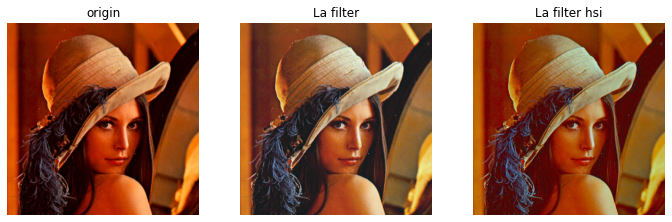

In [25]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0638(a)(lenna_RGB).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

new_image = LaplaceFilter_rgb(kernel_type=3,image = image1 , c = 0.15)
ax = fig.add_subplot(3,4,2)
ax.imshow(new_image,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"La filter")

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0638(a)(lenna_RGB).tif",cv2.IMREAD_COLOR)
new_image1 = LaplaceFilter_hsi(kernel_type=3,image = image,c = 0.3)
ax = fig.add_subplot(3,4,3)
ax.imshow(new_image1)
ax.axis('off')
ax.set_title(f"La filter hsi")


# 6.7 使用彩色分割图像

## 6.7.1 彩色空间中的分割

In [26]:
def binary(m,image):
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(0,image.shape[0]):
        for j in range (0,image.shape[1]):
            if image[i][j] <= m:
                new_image[i][j] = 0
            else:
                new_image[i][j] = 255
    return new_image

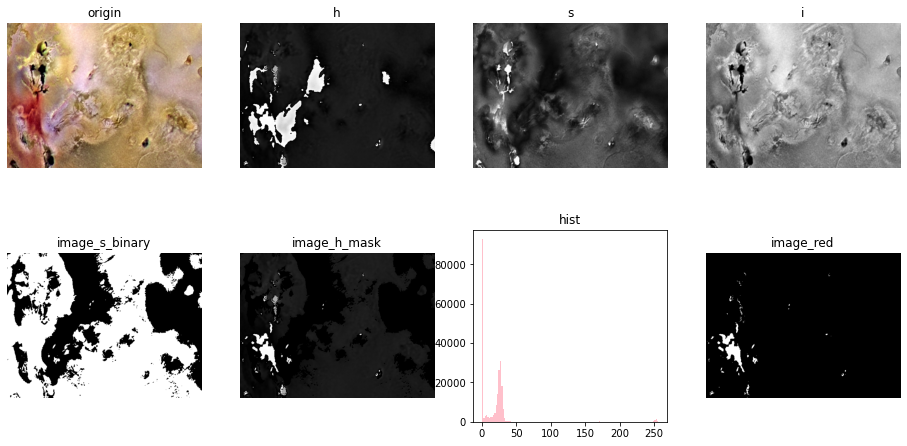

In [27]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0642(a)(jupiter_moon_original).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

image_hsi = bgr2hsi(image)

image_h = image_scaling(image_hsi[:,:,0],255)
image_s = image_scaling(image_hsi[:,:,1],255)
image_i = image_scaling(image_hsi[:,:,2],255)
ax = fig.add_subplot(3,4,2)
ax.imshow(image_h,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"h")
ax = fig.add_subplot(3,4,3)
ax.imshow(image_s,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"s")
ax = fig.add_subplot(3,4,4)
ax.imshow(image_i,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"i")

image_s_binary = binary(50,image_s)
ax = fig.add_subplot(3,4,5)
ax.imshow(image_s_binary,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"image_s_binary")

image_h_mask = image_h * image_scaling(image_s_binary,1)
ax = fig.add_subplot(3,4,6)
ax.imshow(image_h_mask,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"image_h_mask")

image_reshape = image_h_mask.reshape(-1)
ax = fig.add_subplot(3,4,7)
ax.hist(image_reshape,128,[0,256],color='PINK')
ax.set_title(f"hist")

image_red = binary(200,image_h_mask)
ax = fig.add_subplot(3,4,8)
ax.imshow(image_red ,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"image_red")

plt.show()

## 6.7.2 RGB中的图像分割

In [28]:
def get_box(left,right,up,down,image):
    new_image = image.copy()
    new_image[up:down,left-2:left+2,:] = [255,255,255]
    new_image[up:down,right-2:right+2,:] = [255,255,255]
    new_image[up-2:up+2,left:right,:] = [255,255,255]
    new_image[down-2:down+2,left:right,:] = [255,255,255]
    return new_image

# 需要输入矩形框的位置，以及 C表示标准差的倍数
def ImageSegment_rgb(left,right,up,down,image,c):
    #  根据规定的界限计算BOX的均值和标准差
    box = image[up:down,left:right,:]
    mean_r,std_r = np.mean(box[:,:,0]),np.std(box[:,:,0])
    mean_g,std_g = np.mean(box[:,:,1]),np.std(box[:,:,1])
    mean_b,std_b = np.mean(box[:,:,2]),np.std(box[:,:,2])
    image_r = image1[:,:,0]
    image_g = image1[:,:,1]
    image_b = image1[:,:,2]
    # 获取正方体的掩膜版
    image_r_mask = np.bitwise_and(image_r < mean_r + c * std_r,image_r > mean_r - c * std_r)
    image_g_mask = np.bitwise_and(image_g < mean_g + c * std_g,image_g > mean_g - c * std_g)
    image_b_mask = np.bitwise_and(image_b < mean_b + c * std_b,image_b > mean_b - c * std_b)
    image_mask = np.bitwise_and(image_r_mask,image_g_mask,image_b_mask)
    # 进行赋值
    new_image = np.zeros(image1.shape)
    new_image[image_mask] = [255,255,255]
    return new_image

Text(0.5, 1.0, 'origin')

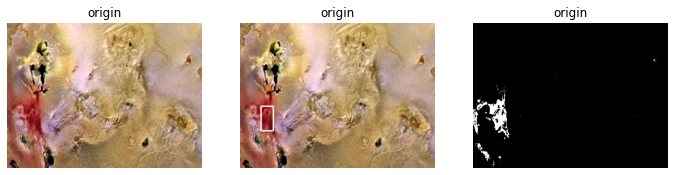

In [29]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0642(a)(jupiter_moon_original).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

new_image= get_box(60,95,240,310,image1)
ax = fig.add_subplot(3,4,2)
ax.imshow(new_image ,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

new_image1 = ImageSegment_rgb(60,95,240,310,image1,c=1.25)
ax = fig.add_subplot(3,4,3)
ax.imshow(new_image1.astype('uint8') ,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")


## 6.7.3 彩色边缘检测

In [30]:
# 目前大多数都是先灰度化再进行灰度边缘检测

def rgb2gray(image):
    new_image = np.zeros(image.shape[:2])
    new_image = 0.299 * image[:,:,0] + 0.587 * image[:,:,1] +  0.114 * image[:,:,2]
    return new_image

def SobelFilter(image):
    kernel_gx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    kernel_gy = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    m = kernel_gx.shape[0]
    n = kernel_gx.shape[1]
    adjust_value_m = int((m - 1)/2)
    adjust_value_n = int((n - 1)/2)
    # 对图像进行零填充
    image_zero_filled = np.zeros((image.shape[0] + m - 1,image.shape[1] + n - 1))
    image_zero_filled[adjust_value_m:image.shape[0] + adjust_value_m,adjust_value_n:image.shape[1] + adjust_value_n] = image
    # 进行卷积运算  
    new_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            gx = np.sum(kernel_gx * image_zero_filled[i:i+m,j:j+n])
            gy = np.sum(kernel_gy*image_zero_filled[i:i+m,j:j+n])
            new_image[i,j] = np.abs(gx) + np.abs(gy)
    return new_image

Text(0.5, 1.0, 'origin')

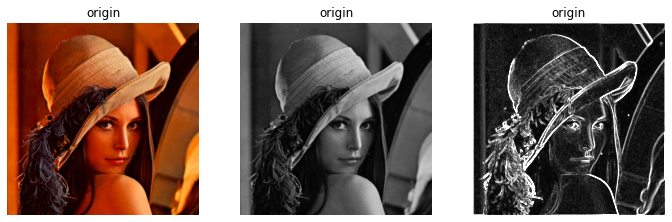

In [31]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2
fig = plt.figure(figsize=(16,12))

image = cv2.imread("G:/Python/Digital Image Processing/CH06 Color Image Processing/DIP3E_Original_Images_CH06/Fig0646(a)(lenna_original_RGB).tif",cv2.IMREAD_COLOR)
ax = fig.add_subplot(3,4,1)
image1 = bgr2rgb(image)
ax.imshow(image1,vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

image_gray = rgb2gray(image1)
ax = fig.add_subplot(3,4,2)
ax.imshow(image_gray,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")

image_sobel = SobelFilter(image_gray)
ax = fig.add_subplot(3,4,3)
ax.imshow(image_sobel,cmap='gray',vmin=0,vmax=255)
ax.axis('off')
ax.set_title(f"origin")